# Severity Prediction Model - Data Approach To Risk Control

## 1.0 Introduction

## 1.1 Background
#### In the last 5 years Seattle have seen increase in fatal accidents and accidents with Serius Injury. The Charts below show traffic accidents since 2014 and 2015 have increased in the number of fatalities and serius injury despite improvement that the city have from 2010. This situation impose problems for Insurance industry to maintain economical premium. If not interviene Insurance company may be forced to adjust the premium up for customer living or commuting in Seattle in which it is a lose-lose situation for both Insurance Industry and community as a whole.¶

##### Chart Below taken from the Seattle city GIS Collision Data

<ipython-input-12-879ac8e75fe0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_sum["Year"] = df_col_sum["INCDATE"].astype("datetime64[ns]").dt.year
<ipython-input-12-879ac8e75fe0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_sum["Accidents"] = 1


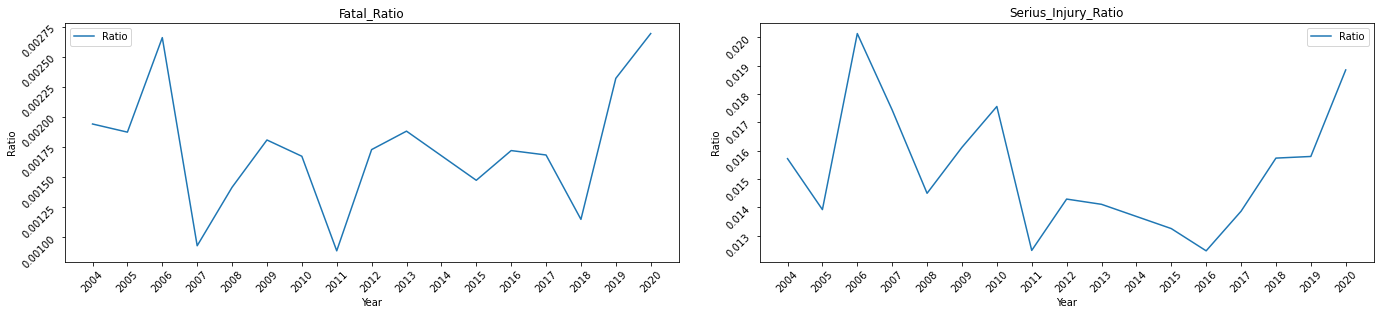

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df_col = pd.read_csv('C:/Project Data/Collisions.csv')

df_col_sum = df_col[["INCDATE","SERIOUSINJURIES","FATALITIES"]]
df_col_sum["Year"] = df_col_sum["INCDATE"].astype("datetime64[ns]").dt.year
df_col_sum["Accidents"] = 1
df_col_sum.drop(columns=["INCDATE"], inplace=True)
df_col_sum1 = df_col_sum.groupby(["Year"]).sum()
df_col_sum1["Serious Injury Ratio"] = df_col_sum1["SERIOUSINJURIES"]/df_col_sum1["Accidents"]
df_col_sum1["Fatality Ratio"] = df_col_sum1["FATALITIES"]/df_col_sum1["Accidents"]
df_col_sum1.reset_index(inplace=True)
df_col_sum1.drop([0,11],inplace=True)
df_col_sum1.set_index(["Year"], inplace=True)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
fig.tight_layout(pad=5.0)
ax1.plot(df_col_sum1["Fatality Ratio"], label='Ratio')
ax1.set_xlabel('Year') 
ax1.set_ylabel('Ratio')
ax1.set_title("Fatal_Ratio")
ax1.legend()
ax1.tick_params(labelrotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.plot(df_col_sum1["Serious Injury Ratio"], label='Ratio')
ax2.set_xlabel('Year') 
ax2.set_ylabel('Ratio')
ax2.set_title("Serius_Injury_Ratio")
ax2.legend()
ax2.tick_params(labelrotation=45)
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))

## 1.2 Problem
#### Data that can provide indication whether a Traffic accident, such data should include i.e. the weather condition during the accident, light condition, how the collision happened and so on. the goal of this analysis is to see whether there are prevailing conditions that lead to severe accident that resulted in serious injury or fatality.

## 1.3 Interest
#### Having identified the prevailing conditons that leads into severe accidents, both Insurance companies and community as a whole could then exercise policies to safe life and reducing the economic cost of insurance. Not only this will benefit Insurance industry but the community would benefit from having fatalities and improvement in wellfare.

# 2.0 Data Acquisition & Cleaning

## 2.1 Data Source
#### For this exercise, we will use Data from Seattle city GIS. The Documentation for the Data can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf) and the link to the Data Source Is [here](https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data?geometry=-122.332%2C47.592%2C-122.312%2C47.594)

## 2.2 Data handling
#### The Data Contains Various attributes that are usefull for modelling accident severity. For the Label we will focus on Severity Code that indicates Serious Injury and fatality. To Maintain Consistency a new Column to be made that mimic secerity code but only highlight Serious Injury and Fatalites.¶
#### Other categorical variables that have more than 2 levels will be formated using one-hot-encoding. Float Data such as long-lat, number of person involved in the injury and fatalites will be omitted since they are the aftermath of the collision and not condition preceeding to the collission. Categorial Data that only have one level such as speeding, inattention, etc. will be omitted from the modelling. Date will be ommited as well to allow the model to be date-aqnostic. however date will still be used to examine model accuracy

## 2.2 Feature Evaluation & Selection
#### The Data have 40 columns and 221,389 rows. excluding base label columns of SEVERITYCODE and SEVERITYDESC as well as columns we will omit we will have .... columns.¶
#### Among the columns, we will focus on ......